In [411]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [412]:
df = pd.read_csv('energy_dataset.csv.zip')
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [413]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [414]:
colunas_usar = []
for i in df.columns:
    if 'generation' in i:
        colunas_usar.append(i)
    elif i == 'total load actual':
        colunas_usar.append(i)
    elif i == 'time':
        colunas_usar.append(i)

df = df[colunas_usar]
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation hydro water reservoir,generation marine,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,total load actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,1899.0,0.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,25385.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,1658.0,0.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,24382.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,1371.0,0.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,22734.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,779.0,0.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,21286.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,720.0,0.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,20264.0


In [415]:
info = df.describe().T
colunas_zeradas = list(info.loc[((info['min'] == 0) & (info['max'] == 0)) | (info['min'].isna()) & (info['max'].isna())].index)

df = df.drop(colunas_zeradas, axis = 1)
df.set_index('time', inplace = True)
df.head()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
time,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0
2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0
2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0


Text(0.5, 0, '')

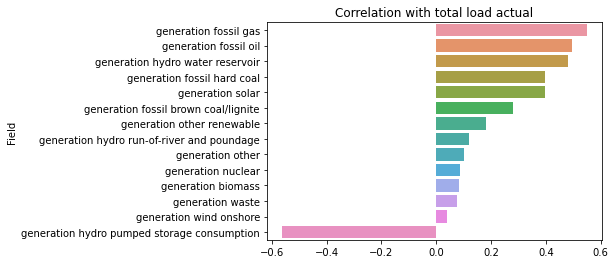

In [416]:
correlations = df.corr()['total load actual'].reset_index()[:-1]
ax = sns.barplot(x = 'total load actual', y = 'index', data = correlations.sort_values(ascending= False, by = 'total load actual'))
ax.set_title('Correlation with total load actual')
ax.set_ylabel('Field')
ax.set_xlabel('')

In [417]:
df.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
count,35045.000000,35046.000000,35046.000000,35046.000000,35045.000000,35045.000000,35045.000000,35046.000000,35047.000000,35046.000000,35046.000000,35046.000000,35045.000000,35046.000000,35028.000000
mean,383.513540,448.059208,5622.737488,4256.065742,298.319789,475.577343,972.116108,2605.114735,6263.907039,60.228585,85.639702,1432.665925,269.452133,5464.479769,28696.939905
std,85.353943,354.568590,2201.830478,1961.601013,52.520673,792.406614,400.777536,1835.199745,839.667958,20.238381,14.077554,1680.119887,50.195536,3213.691587,4574.987950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18041.000000
25%,333.000000,0.000000,4126.000000,2527.000000,263.000000,0.000000,637.000000,1077.250000,5760.000000,53.000000,73.000000,71.000000,240.000000,2933.000000,24807.750000
50%,367.000000,509.000000,4969.000000,4474.000000,300.000000,68.000000,906.000000,2164.000000,6566.000000,57.000000,88.000000,616.000000,279.000000,4849.000000,28901.000000
75%,433.000000,757.000000,6429.000000,5838.750000,330.000000,616.000000,1250.000000,3757.000000,7025.000000,80.000000,97.000000,2578.000000,310.000000,7398.000000,32192.000000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,4523.000000,2000.000000,9728.000000,7117.000000,106.000000,119.000000,5792.000000,357.000000,17436.000000,41015.000000


In [418]:
sns.lineplot(x = 'time', y = 'total load actual', data = df.iloc[:1000])

Error in callback <function flush_figures at 0x7f7d17852af0> (for post_execute):


KeyboardInterrupt: ignored

In [419]:
df.reset_index(inplace = True)
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,25385.0
1,2015-01-01 01:00:00+01:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,24382.0
2,2015-01-01 02:00:00+01:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,22734.0
3,2015-01-01 03:00:00+01:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,21286.0
4,2015-01-01 04:00:00+01:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,20264.0


## Creating time series columns

In [420]:
df['time'] = pd.to_datetime(df['time'], utc = True)


df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df['dayofweek'] = df['time'].dt.dayofweek
df['hour'] = df['time'].dt.hour
df['day'] = df['time'].dt.day

In [421]:
df.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,month,year,dayofweek,hour,day
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,73.0,49.0,196.0,6378.0,25385.0,12,2014,2,23,31
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,71.0,50.0,195.0,5890.0,24382.0,1,2015,3,0,1
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,73.0,50.0,196.0,5461.0,22734.0,1,2015,3,1,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,75.0,50.0,191.0,5238.0,21286.0,1,2015,3,2,1
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,74.0,42.0,189.0,4935.0,20264.0,1,2015,3,3,1


## different types of generations through days of week

In [422]:
df_dweek = df.groupby('dayofweek').mean().reset_index()
df_dweek.head()

,dayofweek,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,total load actual,month,year,hour,day
0,0,384.470330,449.547852,5831.531269,4319.416184,302.054357,428.792408,977.526873,2737.793007,6242.286314,60.277323,84.015584,1441.975824,268.929670,5463.961239,29127.054346,6.496510,2016.506879,11.497707,15.748156
1,1,382.418954,485.881587,5961.198557,4532.307954,309.860148,403.624123,982.074735,2697.071729,6253.797035,60.868964,85.432979,1426.807053,268.475255,5398.886796,29465.627581,6.500000,2016.500000,11.500000,15.802885
2,2,383.784927,491.241483,6050.055711,4580.431463,313.506012,372.859519,979.826052,2742.989379,6296.668938,60.378557,86.631663,1440.461323,268.161956,5463.119639,29736.304871,6.534749,2016.499499,11.502303,15.781895
3,3,384.394296,474.160152,5972.448544,4429.594535,310.525130,385.173349,983.561627,2747.718389,6297.459114,60.861588,87.487236,1459.501197,267.312724,5322.483446,29451.323295,6.540670,2016.492823,11.500000,15.688995
4,4,386.519442,485.663609,5842.576869,4425.906680,313.150548,387.479561,977.726620,2712.745962,6271.330409,60.172283,88.080957,1432.450847,271.023729,5337.061615,29346.252344,6.516746,2016.497608,11.500000,15.665072


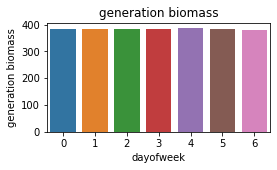

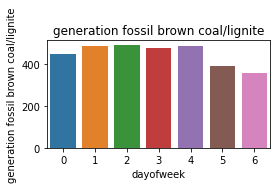

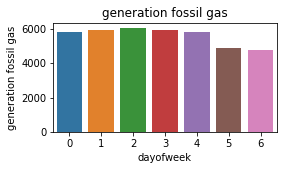

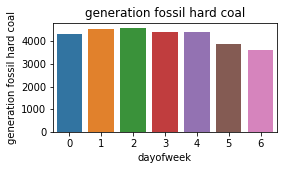

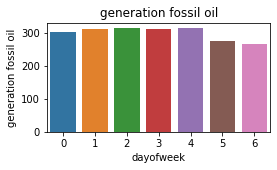

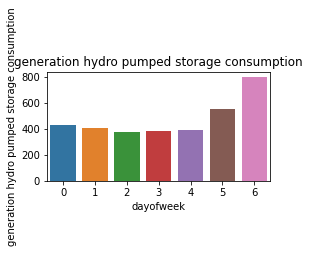

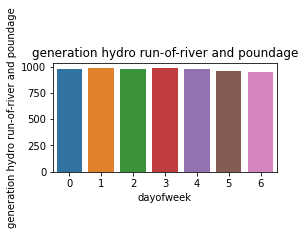

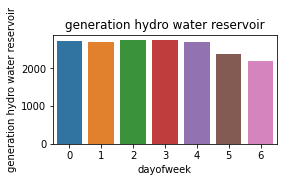

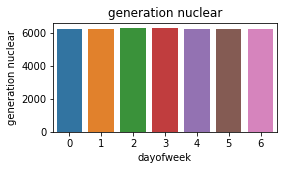

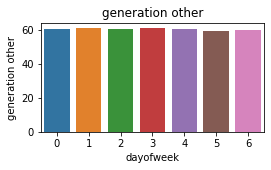

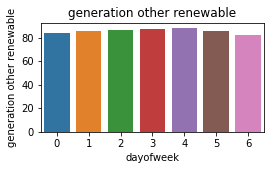

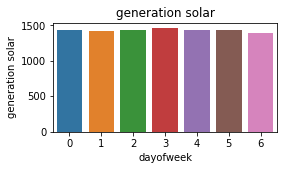

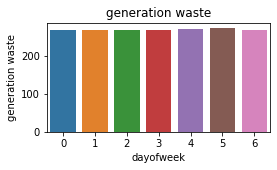

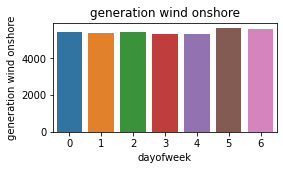

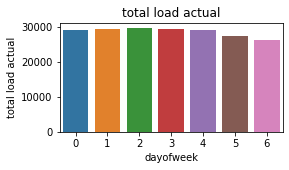

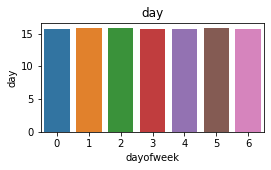

In [423]:
df_dweek = df_dweek.drop(['month', 'year', 'hour'], axis = 1)

for i in df_dweek.columns[1:]:
    plt.figure(i).set_size_inches((4,2))
    ax = sns.barplot(y = i, x = 'dayofweek', data = df_dweek)
    ax.set_title(i)

In [424]:
df_month = df.groupby('month').mean().reset_index()
df_month = df_month.drop(['dayofweek', 'year', 'hour'], axis = 1)


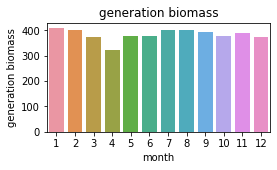

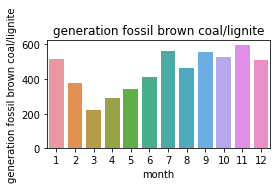

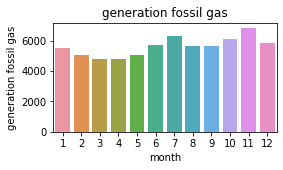

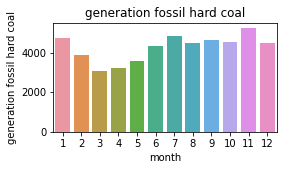

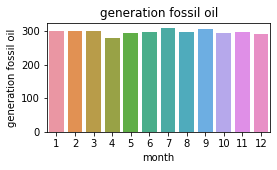

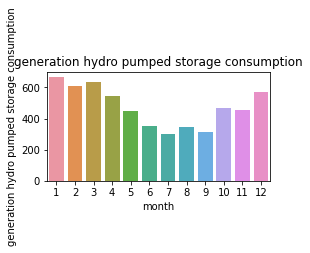

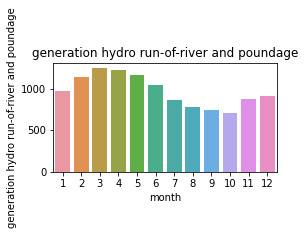

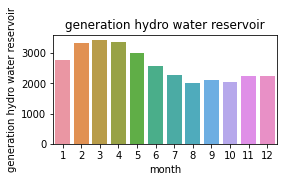

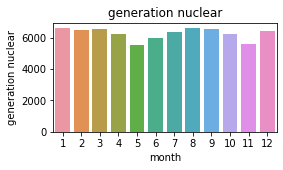

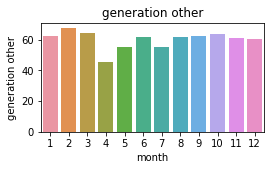

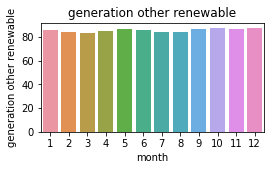

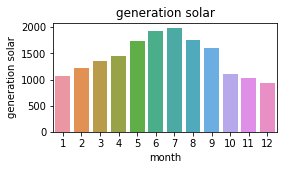

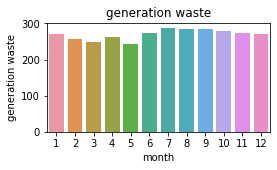

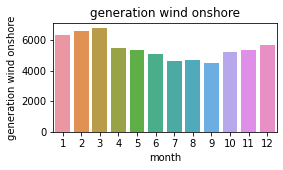

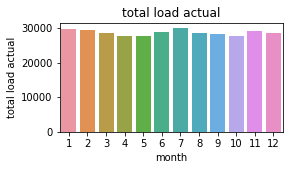

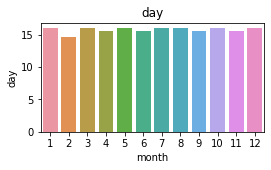

In [425]:
for i in df_month.columns[1:]:
    plt.figure(i).set_size_inches((4,2))
    ax = sns.barplot(y = i, x = 'month', data = df_month)
    ax.set_title(i)

In [426]:
df = df[['year', 'month', 'day', 'dayofweek', 'hour', 'total load actual']]
df['MA_7D' ] = df['total load actual'].copy().rolling(7).mean()
df['MA_30D' ] = df['total load actual'].copy().rolling(30).mean()
df.dropna(inplace = True)

<ipython-input-426-aa92f28d1d9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_7D' ] = df['total load actual'].copy().rolling(7).mean()
<ipython-input-426-aa92f28d1d9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MA_30D' ] = df['total load actual'].copy().rolling(30).mean()
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.py

Text(0.5, 0, '')

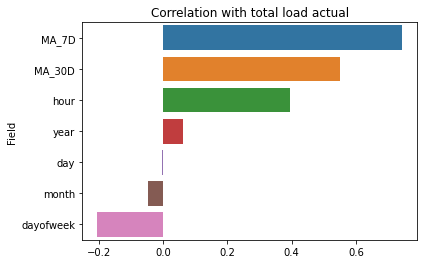

In [427]:
correlations = df.corr()['total load actual'].reset_index()
ax = sns.barplot(x = 'total load actual', y = 'index', data = correlations.sort_values(ascending= False, by = 'total load actual')[1:])
ax.set_title('Correlation with total load actual')
ax.set_ylabel('Field')
ax.set_xlabel('')

In [428]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [429]:
x = df.drop('total load actual', axis = 1)
y = df['total load actual']
test_size = 0.2
data_size = len(x)
x_train = x[:(int(data_size * (1-test_size)))]
x_test = x[(int(data_size * (1-test_size))):]
y_train = y[:(int(data_size * (1-test_size)))]
y_test = y[(int(data_size * (1-test_size))):]

In [430]:
model = XGBRegressor(n_estimators=15000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
model.fit(x_train, y_train,
          eval_set=[(x_train, y_train), (x_test, y_test)],
          verbose=100)

y_pred = model.predict(x_test)

[22:04:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:28727.2	validation_1-rmse:28907.6
[100]	validation_0-rmse:10718.5	validation_1-rmse:10792.4
[200]	validation_0-rmse:4252.68	validation_1-rmse:4263.24
[300]	validation_0-rmse:2095.67	validation_1-rmse:2064.63
[400]	validation_0-rmse:1486.66	validation_1-rmse:1436.83
[500]	validation_0-rmse:1298.57	validation_1-rmse:1257.16
[600]	validation_0-rmse:1221.37	validation_1-rmse:1185.88
[700]	validation_0-rmse:1176.04	validation_1-rmse:1144.74
[800]	validation_0-rmse:1143.11	validation_1-rmse:1113.05
[900]	validation_0-rmse:1116.41	validation_1-rmse:1088.21
[1000]	validation_0-rmse:1095.99	validation_1-rmse:1069.27
[1100]	validation_0-rmse:1078.38	validation_1-rmse:1053.41
[1200]	validation_0-rmse:1062.22	validation_1-rmse:1039.61
[1300]	validation_0-rmse:1048.74	validation_1-rmse:1028.35
[1400]	validation_0-rmse:1036.3	validation_1-rmse:1017.34
[

In [431]:
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = model.validate(x_test, y_test)

In [432]:
print("R² (Cross-validation 10 folds): %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAPE: %.2f" % (mape * 100) + '%')

MSE: 653937.54
RMSE: 808.66
MAPE: 2.06%


In [433]:
df['real/forecast'] = 'real'
df

,year,month,day,dayofweek,hour,total load actual,MA_7D,MA_30D,real/forecast
29,2015,1,2,4,4,22066.0,24102.714286,23848.100000,real
30,2015,1,2,4,5,22275.0,23456.571429,23744.433333,real
31,2015,1,2,4,6,23025.0,22878.714286,23699.200000,real
32,2015,1,2,4,7,23699.0,22702.142857,23731.366667,real
33,2015,1,2,4,8,25834.0,23076.428571,23882.966667,real
...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,0,18,30653.0,28152.142857,26374.866667,real
35060,2018,12,31,0,19,29735.0,28309.142857,26457.233333,real
35061,2018,12,31,0,20,28071.0,28321.000000,26526.200000,real
35062,2018,12,31,0,21,25801.0,28148.428571,26542.466667,real


In [441]:
import calendar
year = 2019
dayofweek = 0
for month in range(1, 2):
    for day in range(1, calendar.monthrange(year, month)[1] + 1):
        if dayofweek == 6:
            dayofweek = 0
        else:
            dayofweek += 1
        for hour in range(24):
            MA_7D = df['total load actual'][-7:].mean()
            #MA_3D = df['total load actual'][-3:].mean()
            MA_30D = df['total load actual'][-30:].mean()
            ponto = pd.DataFrame({'year':[year], 'month':[month], 'day':[day], 'dayofweek':[dayofweek], 'hour': [hour], 'MA_7D':[MA_7D],
                       'MA_30D' : [MA_30D]})#'MA_3D': [MA_3D], 'MA_30D': [MA_30D]})
            predicao = model.predict(ponto)
            df = df.append({'year':year, 'month':month, 'day':day, 'dayofweek':dayofweek, 'hour': hour, 'MA_7D':MA_7D,
                    'MA_30D': MA_30D, 'real/forecast': 'forecast', 'total load actual':predicao[0]}, ignore_index = True)

In [435]:
df = df[:-1]

In [436]:
df.loc[df['real/forecast'] == 'forecast'].head(5)

,year,month,day,dayofweek,hour,total load actual,MA_7D,MA_30D,real/forecast
34466,2019,2,1,1,0,23492.013672,27863.571429,26505.900000,forecast
34467,2019,2,1,1,1,22667.656250,27399.859096,26353.233789,forecast
34468,2019,2,1,1,2,22170.025391,26410.667132,26134.788997,forecast
34469,2019,2,1,1,3,22519.544922,25198.813616,25872.389844,forecast
34470,2019,2,1,1,4,23508.015625,24168.034319,25615.408008,forecast


In [437]:
df.loc[df['real/forecast'] == 'real'].tail(5)

,year,month,day,dayofweek,hour,total load actual,MA_7D,MA_30D,real/forecast
34461,2018,12,31,0,18,30653.0,28152.142857,26374.866667,real
34462,2018,12,31,0,19,29735.0,28309.142857,26457.233333,real
34463,2018,12,31,0,20,28071.0,28321.000000,26526.200000,real
34464,2018,12,31,0,21,25801.0,28148.428571,26542.466667,real
34465,2018,12,31,0,22,24455.0,27863.571429,26505.900000,real


In [438]:
def cria_timestamp(df):
    return datetime.datetime(int(df['year']), int(df['month']), int(df['day']), int(df['hour']))

In [439]:
df['timestamp'] = df.apply(lambda x: cria_timestamp(x), axis = 1)
df

,year,month,day,dayofweek,hour,total load actual,MA_7D,MA_30D,real/forecast,timestamp
0,2015,1,2,4,4,22066.000000,24102.714286,23848.100000,real,2015-01-02 04:00:00
1,2015,1,2,4,5,22275.000000,23456.571429,23744.433333,real,2015-01-02 05:00:00
2,2015,1,2,4,6,23025.000000,22878.714286,23699.200000,real,2015-01-02 06:00:00
3,2015,1,2,4,7,23699.000000,22702.142857,23731.366667,real,2015-01-02 07:00:00
4,2015,1,2,4,8,25834.000000,23076.428571,23882.966667,real,2015-01-02 08:00:00
...,...,...,...,...,...,...,...,...,...,...
42476,2019,12,31,5,18,31757.017578,30358.315011,29821.811328,forecast,2019-12-31 18:00:00
42477,2019,12,31,5,19,31852.154297,30397.453125,29771.068294,forecast,2019-12-31 19:00:00
42478,2019,12,31,5,20,30358.998047,30561.876395,29747.405013,forecast,2019-12-31 20:00:00
42479,2019,12,31,5,21,28386.462891,30617.557757,29688.225065,forecast,2019-12-31 21:00:00


In [442]:
test_data = x_test.merge(y_test, left_index = True, right_index = True)
test_data['timestamp'] = test_data.apply(lambda x: cria_timestamp(x), axis = 1)
x_train = x_train.merge(y_train, left_index = True, right_index = True)
x_train['timestamp'] = x_train.apply(lambda x: cria_timestamp(x), axis = 1)
sns.lineplot(x = 'timestamp', y = 'total load actual', data = x_train)
sns.lineplot(x = 'timestamp', y = 'total load actual', data = test_data)
sns.lineplot(x = 'timestamp', y = 'predicted', data = test_data)

ValueError: ignored

In [443]:
test_data

,year,month,day,dayofweek,hour,MA_7D,MA_30D,total load actual,timestamp
28110,2018,3,17,5,5,24580.428571,29461.866667,24037.0,2018-03-17 05:00:00
28111,2018,3,17,5,6,24185.571429,29438.900000,24808.0,2018-03-17 06:00:00
28112,2018,3,17,5,7,24341.142857,29521.633333,26723.0,2018-03-17 07:00:00
28113,2018,3,17,5,8,25077.428571,29714.900000,29594.0,2018-03-17 08:00:00
28114,2018,3,17,5,9,26148.714286,29961.600000,31249.0,2018-03-17 09:00:00
...,...,...,...,...,...,...,...,...,...
35059,2018,12,31,0,18,28152.142857,26374.866667,30653.0,2018-12-31 18:00:00
35060,2018,12,31,0,19,28309.142857,26457.233333,29735.0,2018-12-31 19:00:00
35061,2018,12,31,0,20,28321.000000,26526.200000,28071.0,2018-12-31 20:00:00
35062,2018,12,31,0,21,28148.428571,26542.466667,25801.0,2018-12-31 21:00:00


In [ ]:
ax = sns.lineplot(data = df.loc[df.timestamp >= '2015-01-01 00:00:00'], y = 'total load actual', x = 'timestamp', hue = 'real/forecast')

sns.lineplot(data = df.loc[df.timestamp >= '2015-01-01 00:00:00'], y = 'MA_30D', x = 'timestamp', linestyle = '--', color = 'r')
ax.legend([])

In [ ]:
fi = pd.DataFrame(data=model.feature_importances_,
             index=x_train.drop(['timestamp', 'total load actual'], axis = 1).columns,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()